In [7]:
# Import the required libraries 
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from textblob import TextBlob 
import plotly.plotly as py
from plotly import tools
import seaborn as sns
import pandas as pd
import string, os, random
import calendar
#from PIL import Image 
import numpy as np
%matplotlib inline
import folium 
import plotly
from folium import plugins 
plotly.offline.init_notebook_mode(connected=True)
path = "data/gun-violence-data_01-2013_03-2018.csv"
df = pd.read_csv(path)

path = "data/annual_spending.csv"
nra_df = pd.read_csv(path)

path = "data/gun_issue.csv"
guns_df = pd.read_csv(path)

df_drug_data = pd.read_csv("data/CDC_drug_data.csv")


In [8]:
#missing_row = ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
               #'-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
#df.loc[len(df)] = missing_row

# Create some additional features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['loss'] = df['n_killed'] + df['n_injured']


In [9]:
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge

new_df = nra_df[nra_df['Year'] > 2013]
new_df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
x2 = list(new_df['Gun Control'])
x3 = list(new_df['Gun Rights'])
x4 = list(new_df['Gun Manufacturing'])
print(x2,x3,x4)



['$2,009,212', '$1,942,415', '$1,657,992', '$1,678,956', '$1,942,396'] ['$11,850,845', '$11,440,684', '$11,181,199', '$11,406,347', '$12,013,482'] ['$1,431,000', '$1,484,000', '$1,120,000', '$1,010,000', '$797,500']


In [10]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

x1, y1 = create_stack_bar_data('year')
x1 = x1[:-1]
y1 = y1[:-1]
print(x1,y1)
#trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="year count", marker=dict(color=['rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(10, 220, 150, 0.6)', 'rgba(222,45,38,0.8)']))
#layout = dict(height=400, title='Gun Violence Incidents by year', legend=dict(orientation="h"));
#fig = go.Figure(data=[trace1], layout=layout);
#iplot(fig)



[2017, 2016, 2015, 2014, 2018] [61401, 58763, 53579, 51854, 13802]


[2009212, 1942415, 1657992, 1678956, 1942396] [11850845, 11440684, 11181199, 11406347, 12013482]
[2009212, 1942415, 1657992, 1678956, 1942396] [11850845, 11440684, 11181199, 11406347, 12013482] [1431000, 1484000, 1120000, 1010000, 797500] [61401, 58763, 53579, 51854, 13802]
[2.009212, 1.942415, 1.657992, 1.678956, 1.942396] [11.850845, 11.440684, 11.181199, 11.406347, 12.013482] [6.1401, 5.8763, 5.3579, 5.1854, 1.3802]


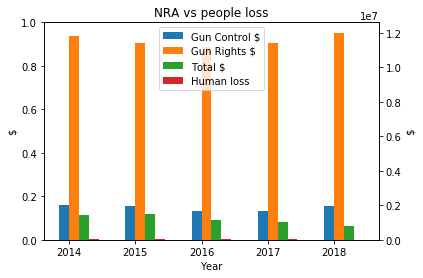

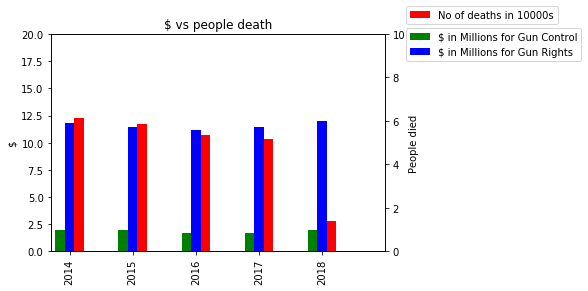

In [17]:
import numpy as np
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

N = 5

gc = [locale.atoi(n[1:]) for n in x2]
gr = [locale.atoi(n[1:]) for n in x3]
print(gc,gr)
g_total = [locale.atoi(n[1:]) for n in x4]
loss = y1

print(gc,gr,g_total,loss)
ind = np.arange(N) 
width = 0.15

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('$')

ax2 = ax1.twinx()
ax2.set_ylabel('No of loss')

#plt.show()
plt.bar(ind, gc, width, label='Gun Control $')
plt.bar(ind+width, gr, width, label='Gun Rights $')
plt.bar(ind+2*width, g_total, width, label='Total $')
plt.bar(ind+3*width, loss, width, label='Human loss')

plt.ylabel('$')
plt.title('NRA vs people loss')

plt.xticks((ind + (width/2)), ('2014', '2015', '2016', '2017', '2018'))
plt.legend(loc='best')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)

ind = np.arange(N)                # the x locations for the groups
width = 0.15                      # the width of the bars

ax2 = ax.twinx()
gc = [i/1000000 for i in gc]
gr = [i/1000000 for i in gr]
loss = [i/10000 for i in loss]
print(gc,gr,loss)
rects1 = ax.bar(ind, gc, width,
            color='green',
            error_kw=dict(elinewidth=2,ecolor='red'),label = "$ in Millions for Gun Control")

rects2 = ax.bar(ind+width, gr, width,
                color='blue',
                error_kw=dict(elinewidth=2,ecolor='blue'),label = "$ in Millions for Gun Rights")

rects3 = ax2.bar(ind+2*width, loss, width,
                color='red',
                error_kw=dict(elinewidth=2,ecolor='yellow'),label = "No of deaths in 10000s")

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,20)
ax.set_ylabel('$')
ax2.set_ylim(0, 10)
ax2.set_ylabel('People died')
ax.set_title('$ vs people death')
xTickMarks = ['2014','2015','2016','2017','2018']
ax.legend(bbox_to_anchor=(1.6, 1.05))
ax2.legend(bbox_to_anchor=(1.53, 1.15))

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

#plt.show()
plt.savefig('Plots/fundingvsdeathyears_final.png', dpi=300, bbox_inches='tight')

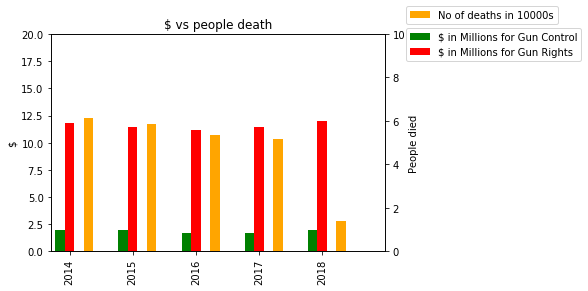

In [15]:

N = 5

fig = plt.figure()
ax = fig.add_subplot(111)

ind = np.arange(N)                # the x locations for the groups
width = 0.15                      # the width of the bars

ax2 = ax.twinx()


rects1 = ax.bar(ind, gc, width,
            color='green',
            error_kw=dict(elinewidth=2,ecolor='red'),label = "$ in Millions for Gun Control")

rects2 = ax.bar(ind+width, gr, width,
                color='red',
                error_kw=dict(elinewidth=2,ecolor='blue'),label = "$ in Millions for Gun Rights")

rects3 = ax2.bar(ind+3*width, loss, width,
                color='orange',
                error_kw=dict(elinewidth=2,ecolor='yellow'),label = "No of deaths in 10000s")

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,20)
ax.set_ylabel('$')
ax2.set_ylim(0, 10)
ax2.set_ylabel('People died')
ax.set_title('$ vs people death')
xTickMarks = ['2014','2015','2016','2017','2018']
ax.legend(bbox_to_anchor=(1.6, 1.05))
ax2.legend(bbox_to_anchor=(1.53, 1.15))

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

#plt.show()
plt.savefig('Plots/fundingvsdeathyears.png', dpi=300, bbox_inches='tight')

[2.009212e-06, 1.942415e-06, 1.6579919999999998e-06, 1.678956e-06, 1.942396e-06] [1.1850845e-05, 1.1440684e-05, 1.1181199e-05, 1.1406347e-05, 1.2013482e-05]


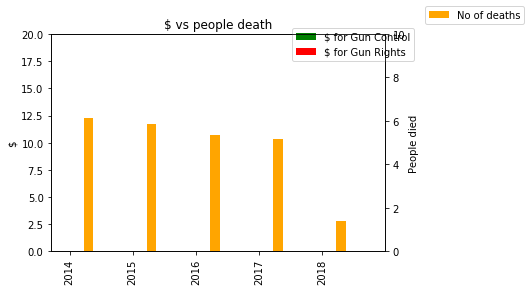

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
N=5
ind = np.arange(N)                # the x locations for the groups
width = 0.15                      # the width of the bars

ax2 = ax.twinx()
gc = [i/1000000 for i in gc]
gr = [i/1000000 for i in gr]
print(gc,gr)
rects1 = ax.bar(ind, gc, width,
            color='green',
            error_kw=dict(elinewidth=2,ecolor='red'),label = "$ for Gun Control")

rects2 = ax.bar(ind+width, gr, width,
                color='red',
                error_kw=dict(elinewidth=2,ecolor='blue'),label = "$ for Gun Rights")

rects4 = ax2.bar(ind+3*width, loss, width,
                color='orange',
                error_kw=dict(elinewidth=2,ecolor='yellow'),label = "No of deaths")

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,20)
ax.set_ylabel('$')
ax2.set_ylim(0, 10)
ax2.set_ylabel('People died')
ax.set_title('$ vs people death')
xTickMarks = ['2014','2015','2016','2017','2018']
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax2.legend(bbox_to_anchor=(1.43, 1.15))

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [19]:
path = "data/gun_issue.csv"
guns_df = pd.read_csv(path)

for i in range(2014,2018,1):
    g2 = pd.DataFrame()
    new_issue_df = guns_df[guns_df['year'] == i]
    new_issue_df = new_issue_df[['state','year','age18longgunpossess',
                                 'age18longgunsale','age21handgunpossess',
                                 'age21handgunsale','age21longgunpossess', 
                                 'age21longgunsale']]
    g1 = new_issue_df.groupby(["state"], as_index=False).sum()
    g1['total_guns'] = g1['age18longgunpossess'] + g1['age18longgunsale'] + g1['age21handgunpossess'] + g1['age21handgunsale'] + g1['age21longgunpossess'] + g1['age21longgunsale']
    g2['State'] = g1['state']
    g2['Guns'] = g1['total_guns']
    print(g2)


             State  Guns
0          Alabama     0
1           Alaska     1
2          Arizona     1
3         Arkansas     0
4       California     2
5         Colorado     0
6      Connecticut     4
7         Delaware     1
8          Florida     2
9          Georgia     0
10          Hawaii     5
11           Idaho     0
12        Illinois     0
13         Indiana     0
14            Iowa     3
15          Kansas     0
16        Kentucky     0
17       Louisiana     1
18           Maine     0
19        Maryland     3
20   Massachusetts     5
21        Michigan     2
22       Minnesota     0
23     Mississippi     0
24        Missouri     0
25         Montana     0
26        Nebraska     1
27          Nevada     1
28   New Hampshire     0
29      New Jersey     4
30      New Mexico     0
31        New York     2
32  North Carolina     0
33    North Dakota     0
34            Ohio     2
35        Oklahoma     2
36          Oregon     1
37    Pennsylvania     1
38    Rhode Island     4


In [20]:
path = "data/fed_guns_issue.csv"
fed_guns_df = pd.read_csv(path)

fed_guns_df = fed_guns_df[['Premise State','Lic Type']]
fed_guns_df_state = fed_guns_df.groupby(["Premise State"], as_index=False).count()
fed_guns_df_lic_type = fed_guns_df.groupby(["Lic Type"], as_index=False).count()

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = fed_guns_df_state['Premise State'],
        z = fed_guns_df_state['Lic Type'],
        locationmode = 'USA-states',
        text = fed_guns_df_state['Premise State'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "States Vs Gun issue no")
        ) ]

layout = dict(
        title = 'State wise and Federal Gun issue',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )
#print(fed_guns_df_state)
#print(fed_guns_df_lic_type)




c:\users\arun\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning:

Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.



Text(0.5, 1.0, 'Type of guns issued till 2017')

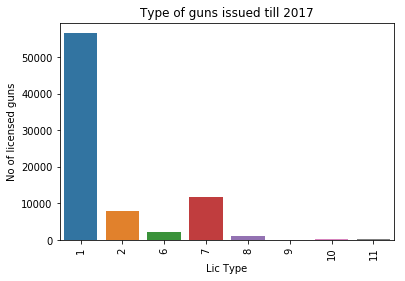

In [21]:
path = "data/fed_guns_issue.csv"
fed_guns_df = pd.read_csv(path)

fed_guns_df = fed_guns_df[['Premise State','Lic Type']]
#fed_guns_df_state = fed_guns_df.groupby(["Premise State"], as_index=False).count()
#print(fed_guns_df.groupby(["Lic Type"], as_index=False).count())
fed_guns_df['Lic Type'] = [int(lic_type) for lic_type in fed_guns_df['Lic Type']]
#print(fed_guns_df)
fed_guns_df_lic_type = fed_guns_df.groupby(["Lic Type"], as_index=False).count()
sns.barplot(x='Lic Type', y='Premise State', data=fed_guns_df_lic_type)
plt.xticks(rotation=90)
plt.ylabel('No of licensed guns')
plt.title('Type of guns issued till 2017')


In [22]:
path = "data/gun_dollars.csv"
gun_dollars_df = pd.read_csv(path)
new_gun_df = gun_dollars_df[['Distid', 'GunControlTotal','GunRightsTotal']]
states_id = new_gun_df['Distid']
states_id = [i[:2] for i in states_id]
new_gun_df['State'] = states_id

new_gun_df['GunControlTotal'] = [locale.atoi(n[1:]) for n in new_gun_df['GunControlTotal']]
new_gun_df['GunRightsTotal'] = [locale.atoi(n[1:]) for n in new_gun_df['GunRightsTotal']]
#print(new_gun_df)

g1 = new_gun_df.groupby(["State"], as_index=False).sum()
#print(g1)
gun_funding_df = g1.sort_values(by='State')
gun_funding_df

c:\users\arun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\arun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\arun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,State,GunControlTotal,GunRightsTotal
0,AK,0,270570
1,AL,2135,312015
2,AR,0,202980
3,AZ,30847,431746
4,CA,200390,653531
5,CO,68903,306202
6,CT,58546,0
7,DE,10500,0
8,FL,38535,468579
9,GA,27459,390406


In [ ]:
#g1.sort_values(by=['GunRightsTotal'],ascending=False)

In [ ]:




# #state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}



# data = [ dict(
#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = g1['State'],
#         z = g1['GunRightsTotal'],
#         locationmode = 'USA-states',
#         text = g1['State'],
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             ) ),
#         colorbar = dict(
#             title = "Gun Violence States funding")
#         ) ]

# layout = dict(
#         title = 'State wise funding for Gun rights',
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)'),
#              )

# fig = dict( data=data, layout=layout )
# iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
# data = [ dict(
#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = g1['State'],
#         z = g1['GunControlTotal'],
#         locationmode = 'USA-states',
#         text = g1['State'],
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             ) ),
#         colorbar = dict(
#             title = "Gun Violence States funding")
#         ) ]

# layout = dict(
#         title = 'State wise funding info',
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)'),
#              )

# fig = dict( data=data, layout=layout )
# iplot( fig, filename='d3-cloropleth-map' )

In [23]:
states_df = df['state'].value_counts()
df
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [24]:
print(states_df)
top_10_states = statesdf.sort_values(by='state')
#top_10_states['GunControlFunding'] = gun_funding_df['GunControlTotal']
#top_10_states['GunRightsFunding'] = gun_funding_df['GunRightsTotal']
top_10_states = top_10_states.join(gun_funding_df[['GunControlTotal', 'GunRightsTotal']])
top_10_states = top_10_states.sort_values(by='counts',ascending=False)
top_10_states.drop(top_10_states.tail(41).index,inplace=True)
top_10_states

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

,state,counts,state_code,GunControlTotal,GunRightsTotal
0,Illinois,17556,IL,0.0,270570.0
1,California,16306,CA,2135.0,312015.0
2,Florida,15029,FL,0.0,202980.0
3,Texas,13577,TX,30847.0,431746.0
4,Ohio,10244,OH,200390.0,653531.0
5,New York,9712,NY,68903.0,306202.0
6,Pennsylvania,8929,PA,58546.0,0.0
7,Georgia,8925,GA,10500.0,0.0
8,North Carolina,8739,NC,38535.0,468579.0
9,Louisiana,8103,LA,27459.0,390406.0


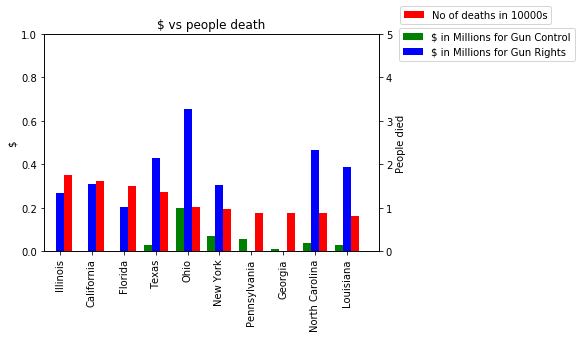

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
N=10
ind = np.arange(N)                # the x locations for the groups
width = 0.25                      # the width of the bars

ax2 = ax.twinx()
gc_2 = [i/1000000 for i in top_10_states['GunControlTotal']]
gr_2 = [i/1000000 for i in top_10_states['GunRightsTotal']]
loss_2 = [i/10000 for i in top_10_states['counts']]

rects1 = ax.bar(ind, gc_2, width,
            color='green',
            error_kw=dict(elinewidth=2,ecolor='red'),label = "$ in Millions for Gun Control")

rects2 = ax.bar(ind+width,gr_2, width,
                color='blue',
                error_kw=dict(elinewidth=2,ecolor='blue'),label = "$ in Millions for Gun Rights")

rects4 = ax2.bar(ind+2*width, loss_2, width,
                color='red',
                error_kw=dict(elinewidth=2,ecolor='yellow'),label = "No of deaths in 10000s")

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('$')
ax2.set_ylim(0, 5)
ax2.set_ylabel('People died')
ax.set_title('$ vs people death')
xTickMarks = top_10_states['state']
ax.legend(bbox_to_anchor=(1.6, 1.05))
ax2.legend(bbox_to_anchor=(1.53, 1.15))

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

#plt.show()
plt.savefig('Plots/fundingvsdeathperstate.png', dpi=300, bbox_inches='tight')

In [32]:
top_10_states_drug = statesdf.sort_values(by='state_code')
df_drug_data = df_drug_data.sort_values(by='State')
top_10_states_drug = top_10_states_drug.join(df_drug_data[['Total']])
top_10_states_drug = top_10_states_drug.sort_values(by='counts',ascending=False)
top_10_states_drug.drop(top_10_states_drug.tail(41).index,inplace=True)
top_10_states_drug

,state,counts,state_code,Total
0,Illinois,17556,IL,521
1,California,16306,CA,3050
2,Florida,15029,FL,1595
3,Texas,13577,TX,5399
4,Ohio,10244,OH,18702
5,New York,9712,NY,3725
6,Pennsylvania,8929,PA,3466
7,Georgia,8925,GA,800
8,North Carolina,8739,NC,1007
9,Louisiana,8103,LA,15678


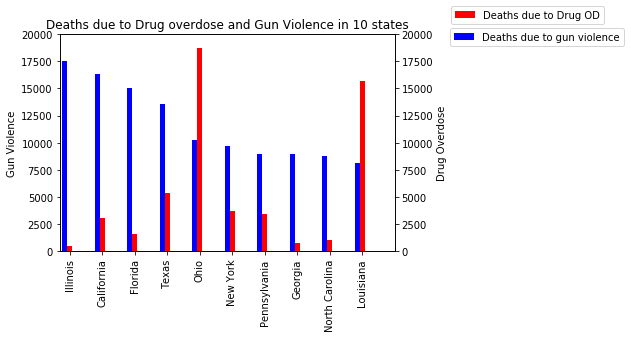

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

N = 10
# INPUT_RAPL_PAAE = dataset[1]
# INPUT_RAPL_AAE = dataset[2]
# REPP_RAPL_PAAE = dataset[3]
# REPP_RAPL_AAE = dataset[4]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars

ax2 = ax.twinx()
## the bars
#print(gc,gr)
#gc = [i/1000000 for i in gc]
#gr = [i/1000000 for i in gr]
rects1 = ax.bar(ind, top_10_states_drug['counts'], width,
            color='blue',
            error_kw=dict(elinewidth=2,ecolor='red'),label = "Deaths due to gun violence")


rects4 = ax2.bar(ind+width, top_10_states_drug['Total'], width,
                color='red',
                error_kw=dict(elinewidth=2,ecolor='yellow'),label = "Deaths due to Drug OD")

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,20000)
ax.set_ylabel('Gun Violence')
ax2.set_ylim(0, 20000)
ax2.set_ylabel('Drug Overdose')
ax.set_title('Deaths due to Drug overdose and Gun Violence in 10 states')
xTickMarks = top_10_states_drug['state']
ax.legend(bbox_to_anchor=(1.7, 1.05))
ax2.legend(bbox_to_anchor=(1.64, 1.15))

ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

#plt.show()
plt.savefig('Plots/drugvsguns.png', dpi=300, bbox_inches='tight')

In [31]:
#output_file("dodged_bars.html")

years = ['2014','2015', '2016', '2017', '2018']
x_axis = ['Gun Control','Gun Rights','Total','Loss']
data = {'years' : years,
        'Gun Control'   :x2,
        'Gun Rights'   : x3,
        'Total'   : x4,
        'Loss'    : x1}


source = ColumnDataSource(data=data)

p = figure(x_range=years, plot_height=250, title="Gun money vs deaths",
           toolbar_location=None, tools="")

p.vbar(x=dodge('years', -0.25, range=p.x_range), top='Gun Control', width=0.2, source=source,
       color="#c9d9d3", legend=value("Gun Control"))

p.vbar(x=dodge('years',  0.0,  range=p.x_range), top='Gun Rights', width=0.2, source=source,
       color="#718dbf", legend=value("Gun Rights"))

p.vbar(x=dodge('years',  0.25, range=p.x_range), top='Total', width=0.2, source=source,
       color="#e84d60", legend=value("Total"))

p.vbar(x=dodge('years',  0.5, range=p.x_range), top='Loss', width=0.2, source=source,
       color="#e84d60", legend=value("No of deaths"))


p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [ ]:
states_df = df['state'].value_counts()

statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['counts'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

# data = [ dict(
#         type='choropleth',
#         colorscale = scl,
#         autocolorscale = False,
#         locations = statesdf['state_code'],
#         z = statesdf['counts'],
#         locationmode = 'USA-states',
#         text = statesdf['state'],
#         marker = dict(
#             line = dict (
#                 color = 'rgb(255,255,255)',
#                 width = 2
#             ) ),
#         colorbar = dict(
#             title = "Gun Violence Incidents")
#         ) ]

# layout = dict(
#         title = 'State wise number of Gun Violence Incidents',
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
#             showlakes = True,
#             lakecolor = 'rgb(255, 255, 255)'),
#              )
    
fig = dict( data=data, layout=layout )
print(fig)
iplot( fig, filename='d3-cloropleth-map' )

In [35]:
df['n_guns'] = df['n_guns_involved'].apply(lambda x : "10+" if x>=10 else str(x))

tempdf = df['n_guns'].value_counts().reset_index()
tempdf = tempdf[tempdf['index'] != 'nan']
tempdf = tempdf[tempdf['index'] != '1.0']

labels = list(tempdf['index'])
values = list(tempdf['n_guns'])

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', '#c0d1ed', '#efaceb', '#f5f794', '#94f794', '#fcc771']))
layout = dict(height=500, title='Number of Guns Used (More than 1)', legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)
